In [8]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from mountain_goat.preprocessing import create_dataframe

In [9]:
from mountain_goat.main import train_next_move

In [ ]:
#importing data
list_videos= create_dataframe('/home/william/code/ar10000/mountain_goat_dataset/screenshots')

2022-09-02 20:45:47.381572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/william/.pyenv/versions/3.8.12/envs/goat_env/lib/python3.8/site-packages/cv2/../../lib64:
2022-09-02 20:45:47.381743: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-02 20:45:47.381778: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-QOR5S2U2): /proc/driver/nvidia/version does not exist
2022-09-02 20:45:47.382304: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler 


✅ model initialized

✅ model compiled

Train model...

✅ model trained (72 rows)


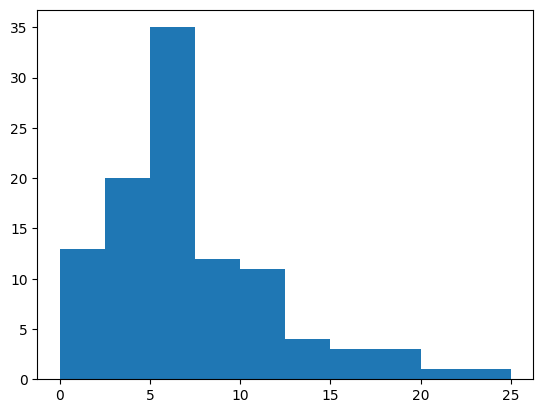

In [10]:
model = train_next_move()

In [ ]:
import pandas as pd
import numpy as np
import ipdb
import matplotlib.pyplot as plt

In [ ]:
# b=np.array(list_videos)

In [ ]:
def check_nan_videos(videos:list):
    """takes in list of dataframes and returns a summary of the videos w.r.t the number of nan values"""
    vid_summary =[]
    for df in videos:
        num_nans= df['right_hand_x'].isnull().sum(axis=0)
        vid_id = df['frame_id'].to_list()[0]
        percent= num_nans/len(df)
        res= {'vid_id': vid_id, 'num_nans': num_nans, 'percent':percent}
        vid_summary.append(res)
    return pd.DataFrame(vid_summary)

In [ ]:
check_nan_videos(list_videos)

In [ ]:
#removing nan values in videos
list_videos_no_nan=[]
for df in list_videos:
    df.dropna(inplace=True)
    list_videos_no_nan.append(df)

In [ ]:
list_videos_no_nan[6]

In [ ]:
list_videos_no_nan[1]

In [ ]:
list_videos_no_nan[6]

In [ ]:
list_videos_no_nan[6].iloc[-1:]

In [ ]:
y = []
X = []
for df in list_videos_no_nan:
    df = df.drop(columns='frame_id', axis=1)
    #last_index = len(df)-1
    last_frame= df.iloc[-1:]
    frames = df[:-1]
    y.append(np.array(last_frame))
    X.append(np.array(frames))
#     print(counter)

In [ ]:
frames_to_plot=[]
for vid in X:
    frames_to_plot.append(vid.shape[0])

In [ ]:
plt.hist(frames_to_plot);

In [ ]:
#padding needs to be done
X_pad = pad_sequences(X, dtype='float32', padding='post', value=-1000)

In [ ]:
X_pad.shape

In [ ]:
X_pad_test = X_pad[90:,:,:]
X_pad_train= X_pad[:90, :,:]

In [ ]:
X_pad_train.shape

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# model architecture 
def initialise():
    """initialize model"""
    #initialize sequential
    model = models.Sequential()
    #adding masking layer
    model.add(layers.Masking(mask_value=-1000))
    #adding rnn layers
    model.add(layers.LSTM(units=20, return_sequences=True, input_shape=(21, 16)))
    model.add(layers.LSTM(units=5, return_sequences=False))
    #adding dense layers
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(16, activation='linear'))
    
    return model

In [ ]:
def compile_model(model):
    """compile model"""
    model.compile(loss= 'mse',
                  optimizer='adam',
                  metrics=["mae"]
        )
    return model

In [ ]:
model = initialise()
model= compile_model(model)


In [ ]:
model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(
    patience= 20,
    restore_best_weights=True
)

In [ ]:
# k=np.array(y)
k[0]

In [ ]:
len(y)

In [ ]:
new_y = np.vstack(y)
    

In [ ]:
y_train=new_y[:90, :]
y_test= new_y[90:, :]
print(y_test.shape)
y_train.shape

In [ ]:
X_pad_train.shape

In [ ]:
history =model.fit(
    X_pad_train,
    y_train,
    epochs= 500,
    validation_split=0.3,
    callbacks=[es],
    batch_size= 32,
    verbose = 1,
        )

In [ ]:

X_pad_test.shape

In [ ]:
y_test.shape

In [ ]:
model.evaluate(X_pad_test[:-1,:,:], y_test)